### **Libraries**

In [ ]:
import gc
import warnings
import numpy as np
import pandas as pd
import scipy.stats as stats

# Plots
import pydot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

from IPython.display import Image

# Sklearn
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### **Consider the Credit Card Default Dataset**


In [ ]:
df = pd.read_csv("Credit Default.csv")

In [ ]:
pd.set_option("display.max_columns", df.shape[1])

In [ ]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [ ]:
df.shape

(30000, 25)

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for 

one month, 2=payment delay for two months, ... 8=payment delay for eight 

months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)


In [ ]:
df.rename(columns={"PAY_0": "PAY_1", "default.payment.next.month": "output"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_1         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6        output  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000

In [ ]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
output       0
dtype: int64

### **Perform Data Cleaning, if any needed.**


In [ ]:
df.SEX.value_counts() # to check for imbalance and overfitting

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Some categories are mislabeled or undocumented.

- The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

- The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

In [ ]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
fil = df.MARRIAGE == 0
df.loc[fil, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Convert all negative values in PAY_n columns to 0 as they indicate delay in payment

In [ ]:
payment_cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in payment_cols:
  fil = (df[col] == -2) | (df[col] == -1)
  df.loc[fil, [col]] = 0

In [ ]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2      0      0   
1   2   120000.0    2          2         2   26      0      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57      0      0      0      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0      0      0     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   output  
0       1  
1       1  
2       0  
3       0  
4       0

### **Perform Uni-variate Analysis for categorical and continuous features**


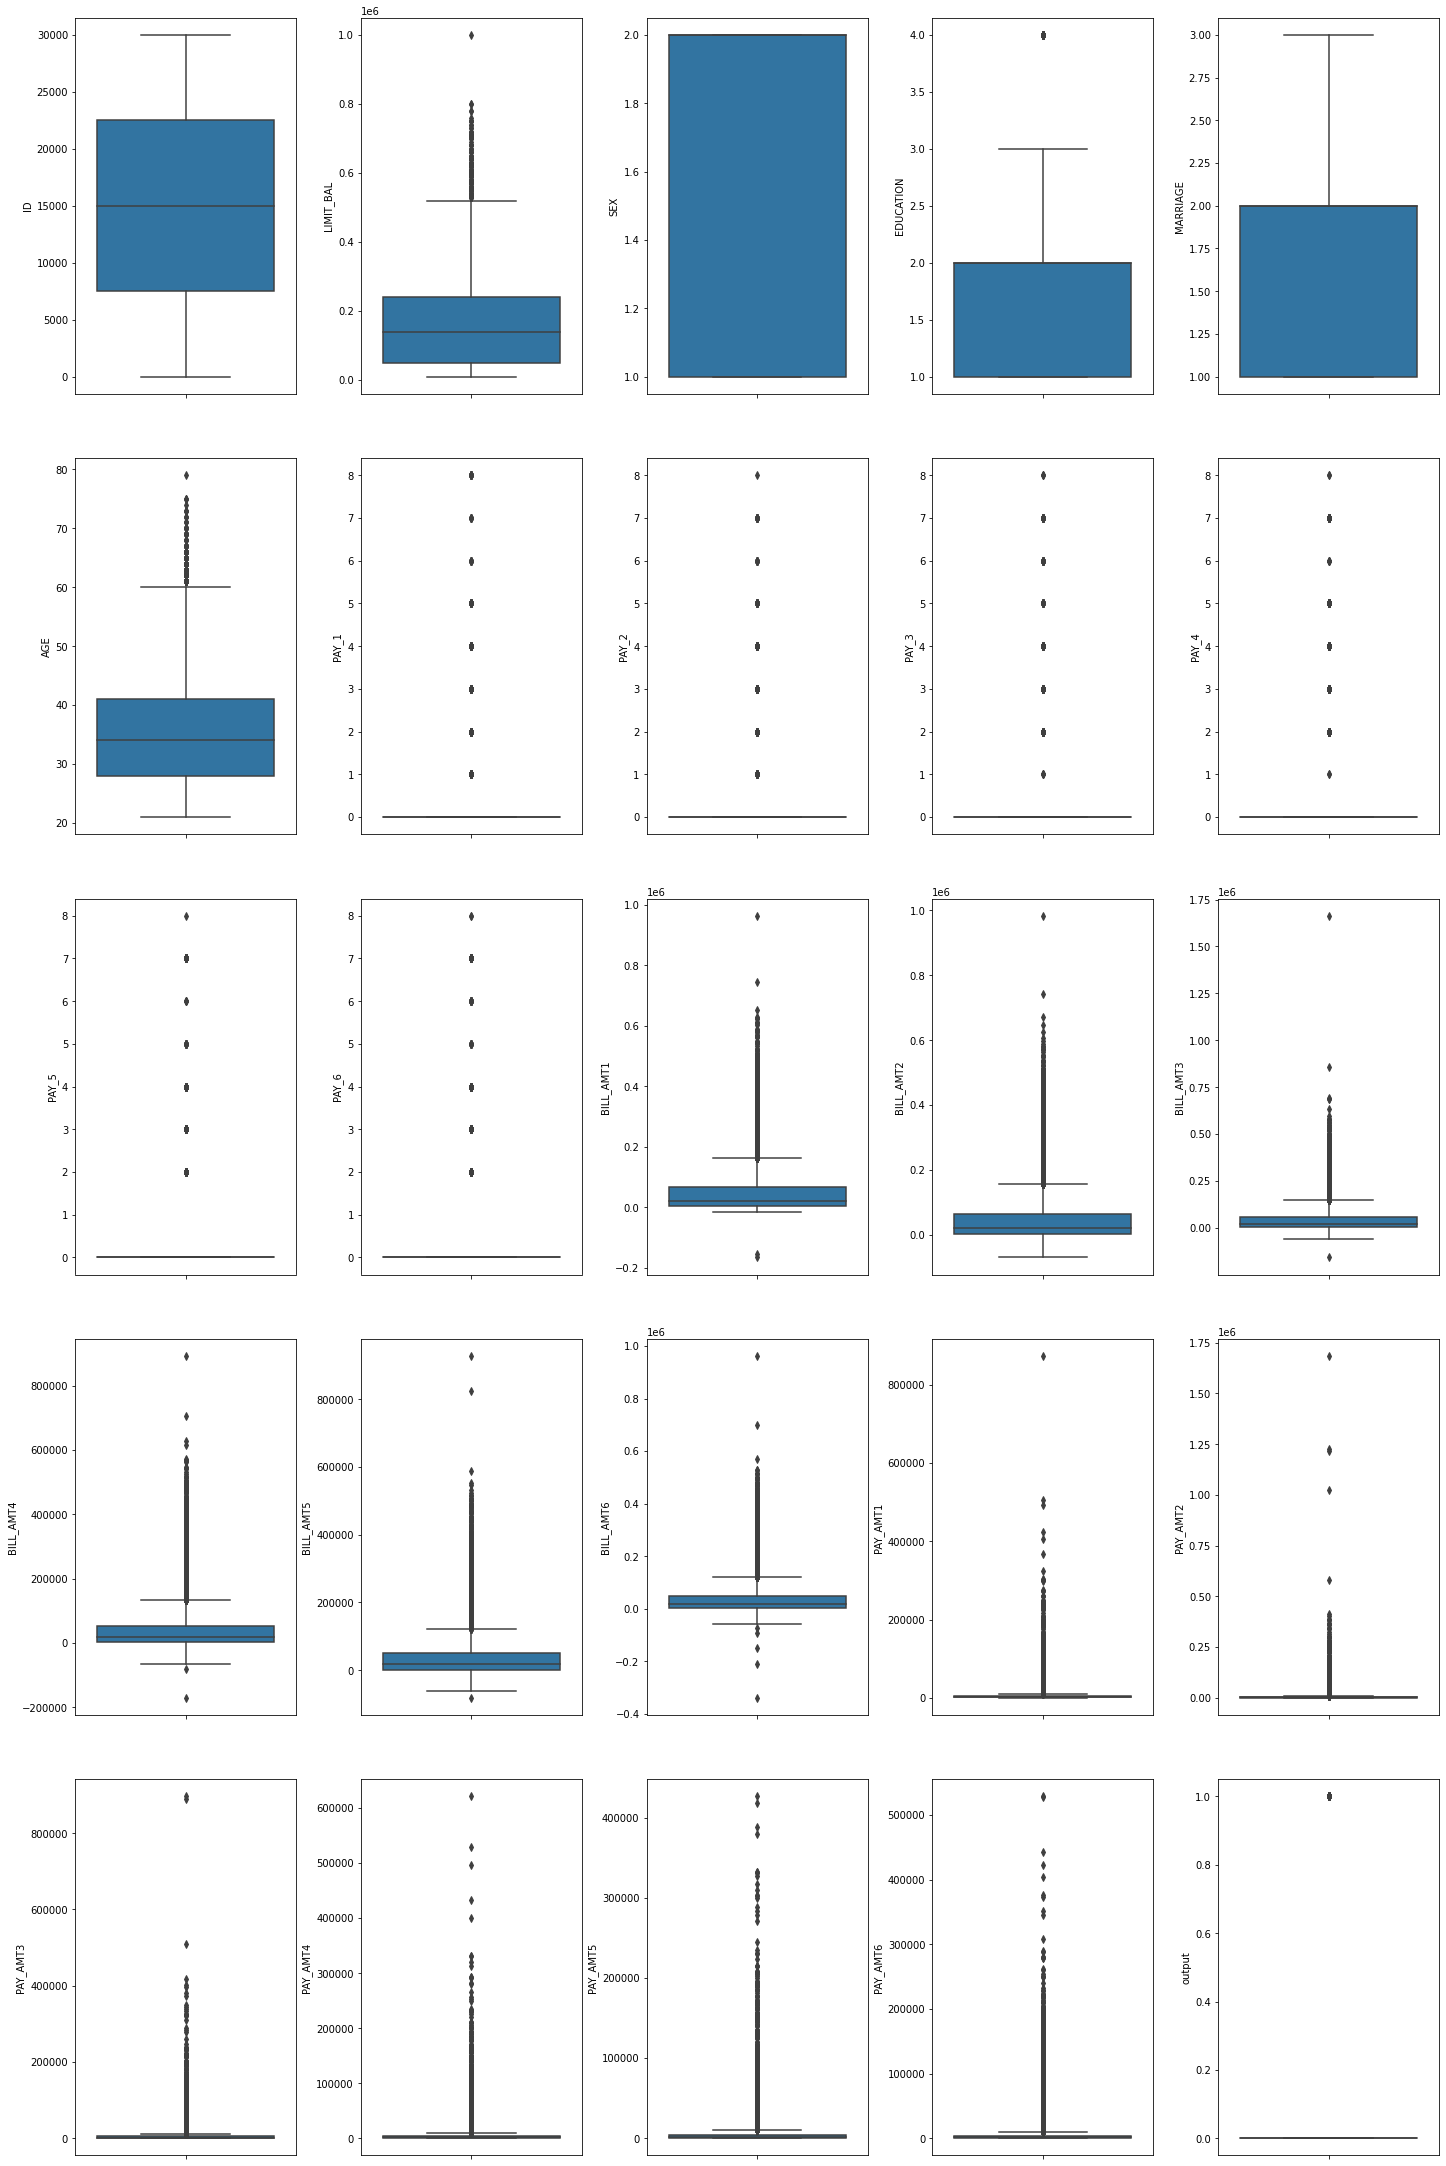

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(20, 30))
index = 0
ax = ax.flatten()
for key, val in df.items():
    sns.boxplot(y=key, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### **Perform Bi-variate Analysis for 2 categorical w.r.t target, categorical to categorical, categorical to continuous, continuous w.r.t target and continuous to continuous.**

In [ ]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [ ]:
corr_2_cols('EDUCATION', 'output')

output         0     1      perc
EDUCATION                       
1           8549  2036  0.192348
2          10700  3330  0.237349
3           3680  1237  0.251576
4            435    33  0.070513

It seems that the higher is the education, the lower is the probability of defaulting the next month.

In [ ]:
corr_2_cols('MARRIAGE', 'output')

output        0     1      perc
MARRIAGE                       
1         10453  3206  0.234717
2         12623  3341  0.209283
3           288    89  0.236074

Here it seems that married people are most likely to default 

In [ ]:
corr_2_cols('MARRIAGE', 'SEX')

SEX          1     2      perc
MARRIAGE                      
1         5190  8469  0.620031
2         6553  9411  0.589514
3          145   232  0.615385

In [ ]:
corr_2_cols('EDUCATION', 'SEX')

SEX           1     2      perc
EDUCATION                      
1          4354  6231  0.588663
2          5374  8656  0.616964
3          1990  2927  0.595282
4           170   298  0.636752

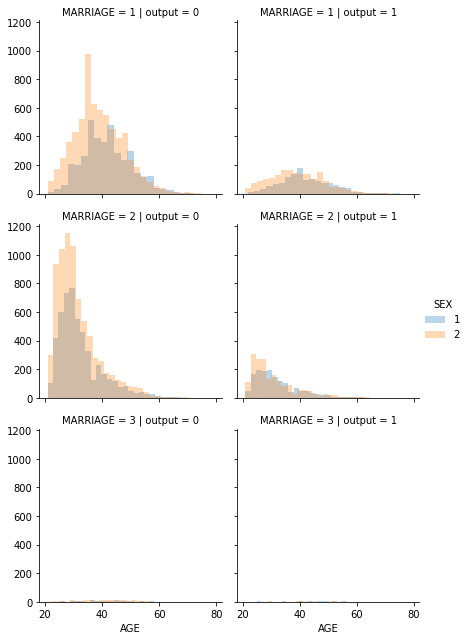

In [ ]:
g = sns.FacetGrid(df, col='output', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()
plt.show()

### **Normalize the features (categorical and continuous)**


In [ ]:
X = df.drop("output", axis=1)
Y = df["output"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24000, 24)
(6000, 24)
(24000,)
(6000,)


In [ ]:
features = X.columns

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Use K-Fold cross validation for train and test split in data**

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB',GradientBoostingClassifier()))

In [ ]:
num_folds = 10
seed = 7
scoring = 'roc_auc'

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(abs(cv_results))
    names.append(name)
    msg = '{}: {} {}'.format(name, abs(cv_results.mean()), abs(cv_results.std()))
    print(msg)

LR: 0.7563481744536558 0.009475225300002782
KNN: 0.6929285565683798 0.010219477143844904
CART: 0.6066304174440929 0.01767212734604916
GB: 0.7791922065729786 0.009316098220693337


### **Plot confusion matrix, classification report**

In [ ]:
def plot_confusion(Y_test, prediction):
    conmat = np.array(confusion_matrix(Y_test, prediction, labels=[1,0]))
    confusion = pd.DataFrame(
        conmat, 
        index=['default', 'not default'],
        columns=['predicted default', 'predicted not default']
    )
    print(confusion)
    fig, ax = plt.subplots()
    cax = ax.matshow(conmat)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + ['predicted default', 'predicted not default'])
    ax.set_yticklabels([''] + ['default', 'not default'])
    plt.show()

In [ ]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):
    lines = cr.split('\n')
    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)

	
    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    plt.show()

Since GB has the highest score, selecting that as model

             predicted default  predicted not default
default                    528                    847
not default                233                   4392


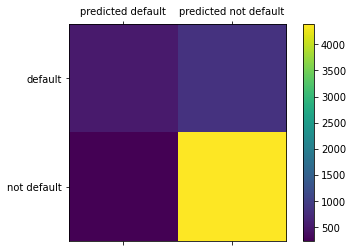

In [ ]:
model = GradientBoostingClassifier(random_state=seed)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
plot_confusion(Y_test, predictions)

In [ ]:
class_report = classification_report(Y_test, predictions, output_dict=False)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4625
           1       0.69      0.38      0.49      1375

    accuracy                           0.82      6000
   macro avg       0.77      0.67      0.69      6000
weighted avg       0.81      0.82      0.80      6000



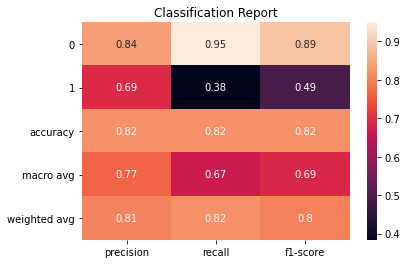

In [ ]:
dict_class_report = classification_report(Y_test, predictions, output_dict=True)
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(dict_class_report).iloc[:-1, :].T, annot=True, ax=ax)
ax.set_title("Classification Report")
plt.show()

### **Check the accuracy score**


In [ ]:
print(f"GB - Accuracy: {model.score(X_test, Y_test)}")

GB - Accuracy: 0.82


In [ ]:
d_classifier = DecisionTreeClassifier()
d_classifier.fit(X_train, Y_train)
d_class_pred = d_classifier.predict(X_test)
print(f"Decision Tree - Accuracy: {d_classifier.score(X_test, Y_test)}")

Decision Tree - Accuracy: 0.7336666666666667


### **Plot the decision tree graph using graphviz**


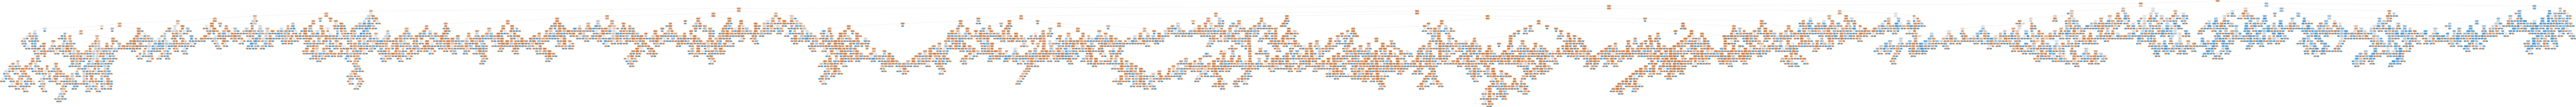

In [ ]:
dot_data = StringIO()
tree.export_graphviz(d_classifier, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### **Hyper-tune parameters such as sample_split_range, criterion, min_samples_leaf, min_samples_split and splitter.**


max_depth:

- The first parameter we will be considering is the max_depth.
- It indicates how deep we allow the decision tree to grow to.
- The deeper the tree more the no. of splits and captures more information about the data.
- In general, Decision Tree overfits for large depth values, that means it perfectly predicts the train data but fails to generalize the findings for new data.

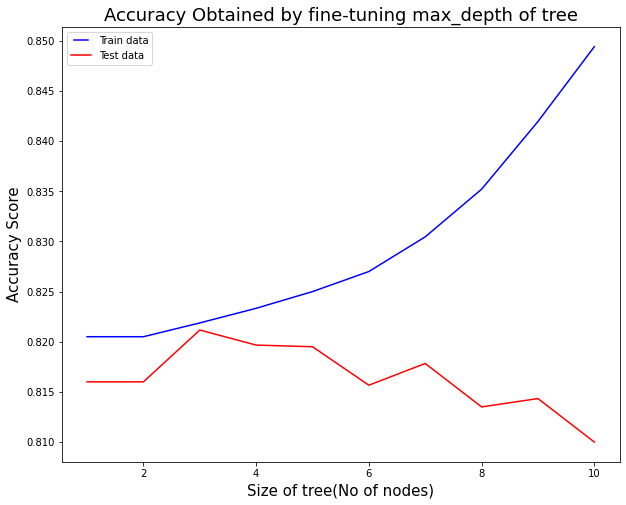

In [ ]:
max_depth = np.linspace(1,10,10,endpoint=True)

train_results = []
test_results = []

for depth in max_depth:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    acc_score_train = accuracy_score(Y_train, train_pred)
    
    train_results.append(acc_score_train)
    
    test_pred = dt.predict(X_test)
    acc_score_test = accuracy_score(Y_test, test_pred)
  
    test_results.append(acc_score_test)
    
plt.figure(figsize=(10, 8))
line1, = plt.plot(max_depth, train_results, 'b',label='Train data')
line2, = plt.plot(max_depth, test_results, 'r',label='Test data')


plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Size of tree(No of nodes)",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)
plt.title("Accuracy Obtained by fine-tuning max_depth of tree",fontsize=18)
plt.show()

min_samples_split

- It specifies the minimum number of samples required to split an internal node.
- We can either specify a number to denote the minimum number or a fraction to denote the percentage of samples in an internal node.

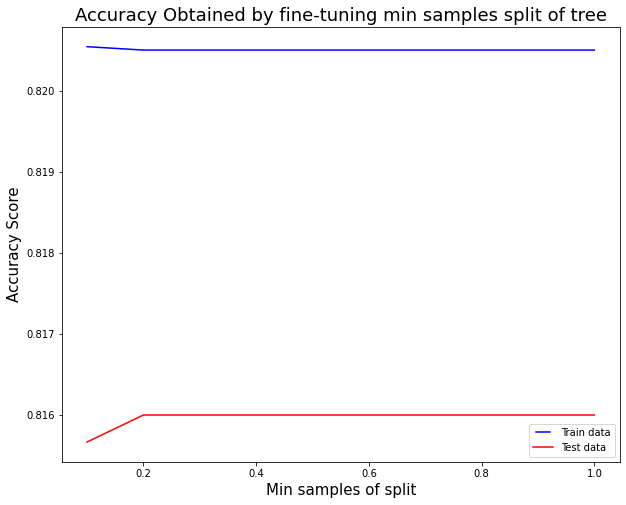

In [ ]:
min_split = np.linspace(0.1,1.0,10,endpoint=True)

train_results = []
test_results = []

for split in min_split:
    dt = DecisionTreeClassifier(min_samples_split=split)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    acc_score_train = accuracy_score(Y_train, train_pred)
    
    # Accuracy score of train data
    train_results.append(acc_score_train)
    
    test_pred = dt.predict(X_test)
    acc_score_test = accuracy_score(Y_test, test_pred)
    
    # Accuracy score of test data
    test_results.append(acc_score_test)
    
plt.figure(figsize=(10, 8))
line1, = plt.plot(min_split, train_results, 'b',label='Train data')
line2, = plt.plot(min_split, test_results, 'r',label='Test data')


plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Min samples of split",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)
plt.title("Accuracy Obtained by fine-tuning min samples split of tree",fontsize=18)
plt.show()

min_samples_leaf

- A leaf node is a node without any children. So, we cannot split the leaf node any further.
- min_samples_leaf is the minimum number of samples required to term a given node as the leaf node.
- This parameter is similar to the min_samples_split, however we consider here the minimum number of samples at the leafs.

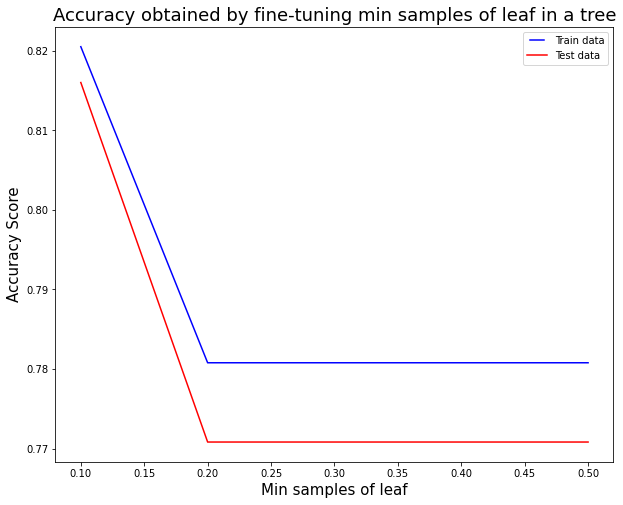

In [ ]:
min_leaf = np.linspace(0.1,0.5,5,endpoint=True)
train_results = []
test_results = []

for leaf in min_leaf:
    dt = DecisionTreeClassifier(min_samples_leaf=leaf)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    acc_score_train = accuracy_score(Y_train, train_pred)
    
    train_results.append(acc_score_train)
    
    test_pred = dt.predict(X_test)
    acc_score_test = accuracy_score(Y_test, test_pred)
    
    test_results.append(acc_score_test)
    
plt.figure(figsize=(10, 8))
line1, = plt.plot(min_leaf, train_results, 'b',label='Train data')
line2, = plt.plot(min_leaf, test_results, 'r',label='Test data')


plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Min samples of leaf",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)
plt.title("Accuracy obtained by fine-tuning min samples of leaf in a tree",fontsize=18)
plt.show()

max_features:-
- It represents the number of features to be considered for the best split
- We can denote the number of features to denote the max_features at each split or a fraction to denote the percentage of features while making a split.
- There are other options to specify max_features as well like sqrt, log2 or None.

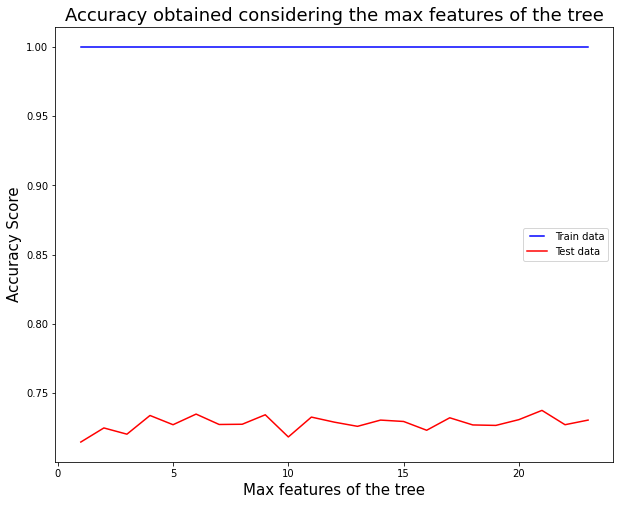

In [ ]:
max_features = list(range(1,X.shape[1]))

train_results = []
test_results = []

for feature in max_features:
    dt = DecisionTreeClassifier(max_features=feature)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    acc_score_train = accuracy_score(Y_train, train_pred)
    
    train_results.append(acc_score_train)
    
    test_pred = dt.predict(X_test)
    acc_score_test = accuracy_score(Y_test, test_pred)
    
    test_results.append(acc_score_test)
    
plt.figure(figsize=(10, 8))
line1, = plt.plot(max_features, train_results, 'b',label='Train data')
line2, = plt.plot(max_features, test_results, 'r',label='Test data')


plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Max features of the tree",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)
plt.title("Accuracy obtained considering the max features of the tree",fontsize=18)
plt.show()